In [186]:
from numpy import arange

from functions_fuzzy import func_nao_linear

import math

import numpy as np

from matplotlib import pyplot as plt

from functions_fuzzy import Gaussiana, trapezoidal

from random import seed

seed(44)
x_suave = np.random.uniform(low=0, high=10, size=1000)
print(x_suave[:5])

[5.13614631 6.3340673  9.46586517 8.19532818 7.93925953]


In [187]:
print(arange(0, 4, 0.3))

[0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3.  3.3 3.6 3.9]


### Gere um conjunto de dados com valores de x no intervalo de [0,10] e calcule os valores correspondentes de f(x) para esses pontos. Atenc ¸˜ao para gerar um n´ umero suficiente de pontos.

In [188]:
samples = [
    arange(0, 10, 0.4),
    arange(0, 10, 0.1),
    arange(0, 10, 0.2),
    arange(0, 10, 0.3),
    arange(0, 10, 0.4),
    arange(0, 10, 0.5),
    arange(0, 10, 0.6),
    arange(0, 10, 0.7),
    arange(0, 10, 0.8),
    arange(0 ,10, 0.9),
    arange(3, 9, 0.4),
    arange(2, 8, 0.4),
    arange(2, 9, 0.4),
    arange(2, 10, 0.4),
    arange(1, 7, 0.4),
    arange(1, 8, 0.4),
    arange(1, 9, 0.4),
    arange(2, 10, 0.3),
    arange(1, 7, 0.3),
    arange(1, 8, 0.3),
    arange(1, 9, 0.3)
] # Geração de 17 amostras com diferentes intervalos entre 0 e 10


# Gerando amostragem "Aleatória" sob a amostragem prévia
complete_sampling = [round(float(x[9]), 5) for x in samples]

complete_output = [round(func_nao_linear(x), 7) for x in complete_sampling]

print(complete_sampling)

print(complete_output)

print(len(samples))


# x_suave = np.linspace(0, 10, 1000)

[3.6, 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 6.6, 5.6, 5.6, 5.6, 4.6, 4.6, 4.6, 4.7, 3.7, 3.7, 3.7]
[np.float64(0.265492), np.float64(1.2269337), np.float64(1.1846001), np.float64(0.7964382), np.float64(0.265492), np.float64(-0.0821954), np.float64(-0.0467867), np.float64(0.292061), np.float64(0.6337617), np.float64(0.6828436), np.float64(0.422906), np.float64(0.0106465), np.float64(0.0106465), np.float64(0.0106465), np.float64(-0.0983265), np.float64(-0.0983265), np.float64(-0.0983265), np.float64(-0.1093338), np.float64(0.2121958), np.float64(0.2121958), np.float64(0.2121958)]
21


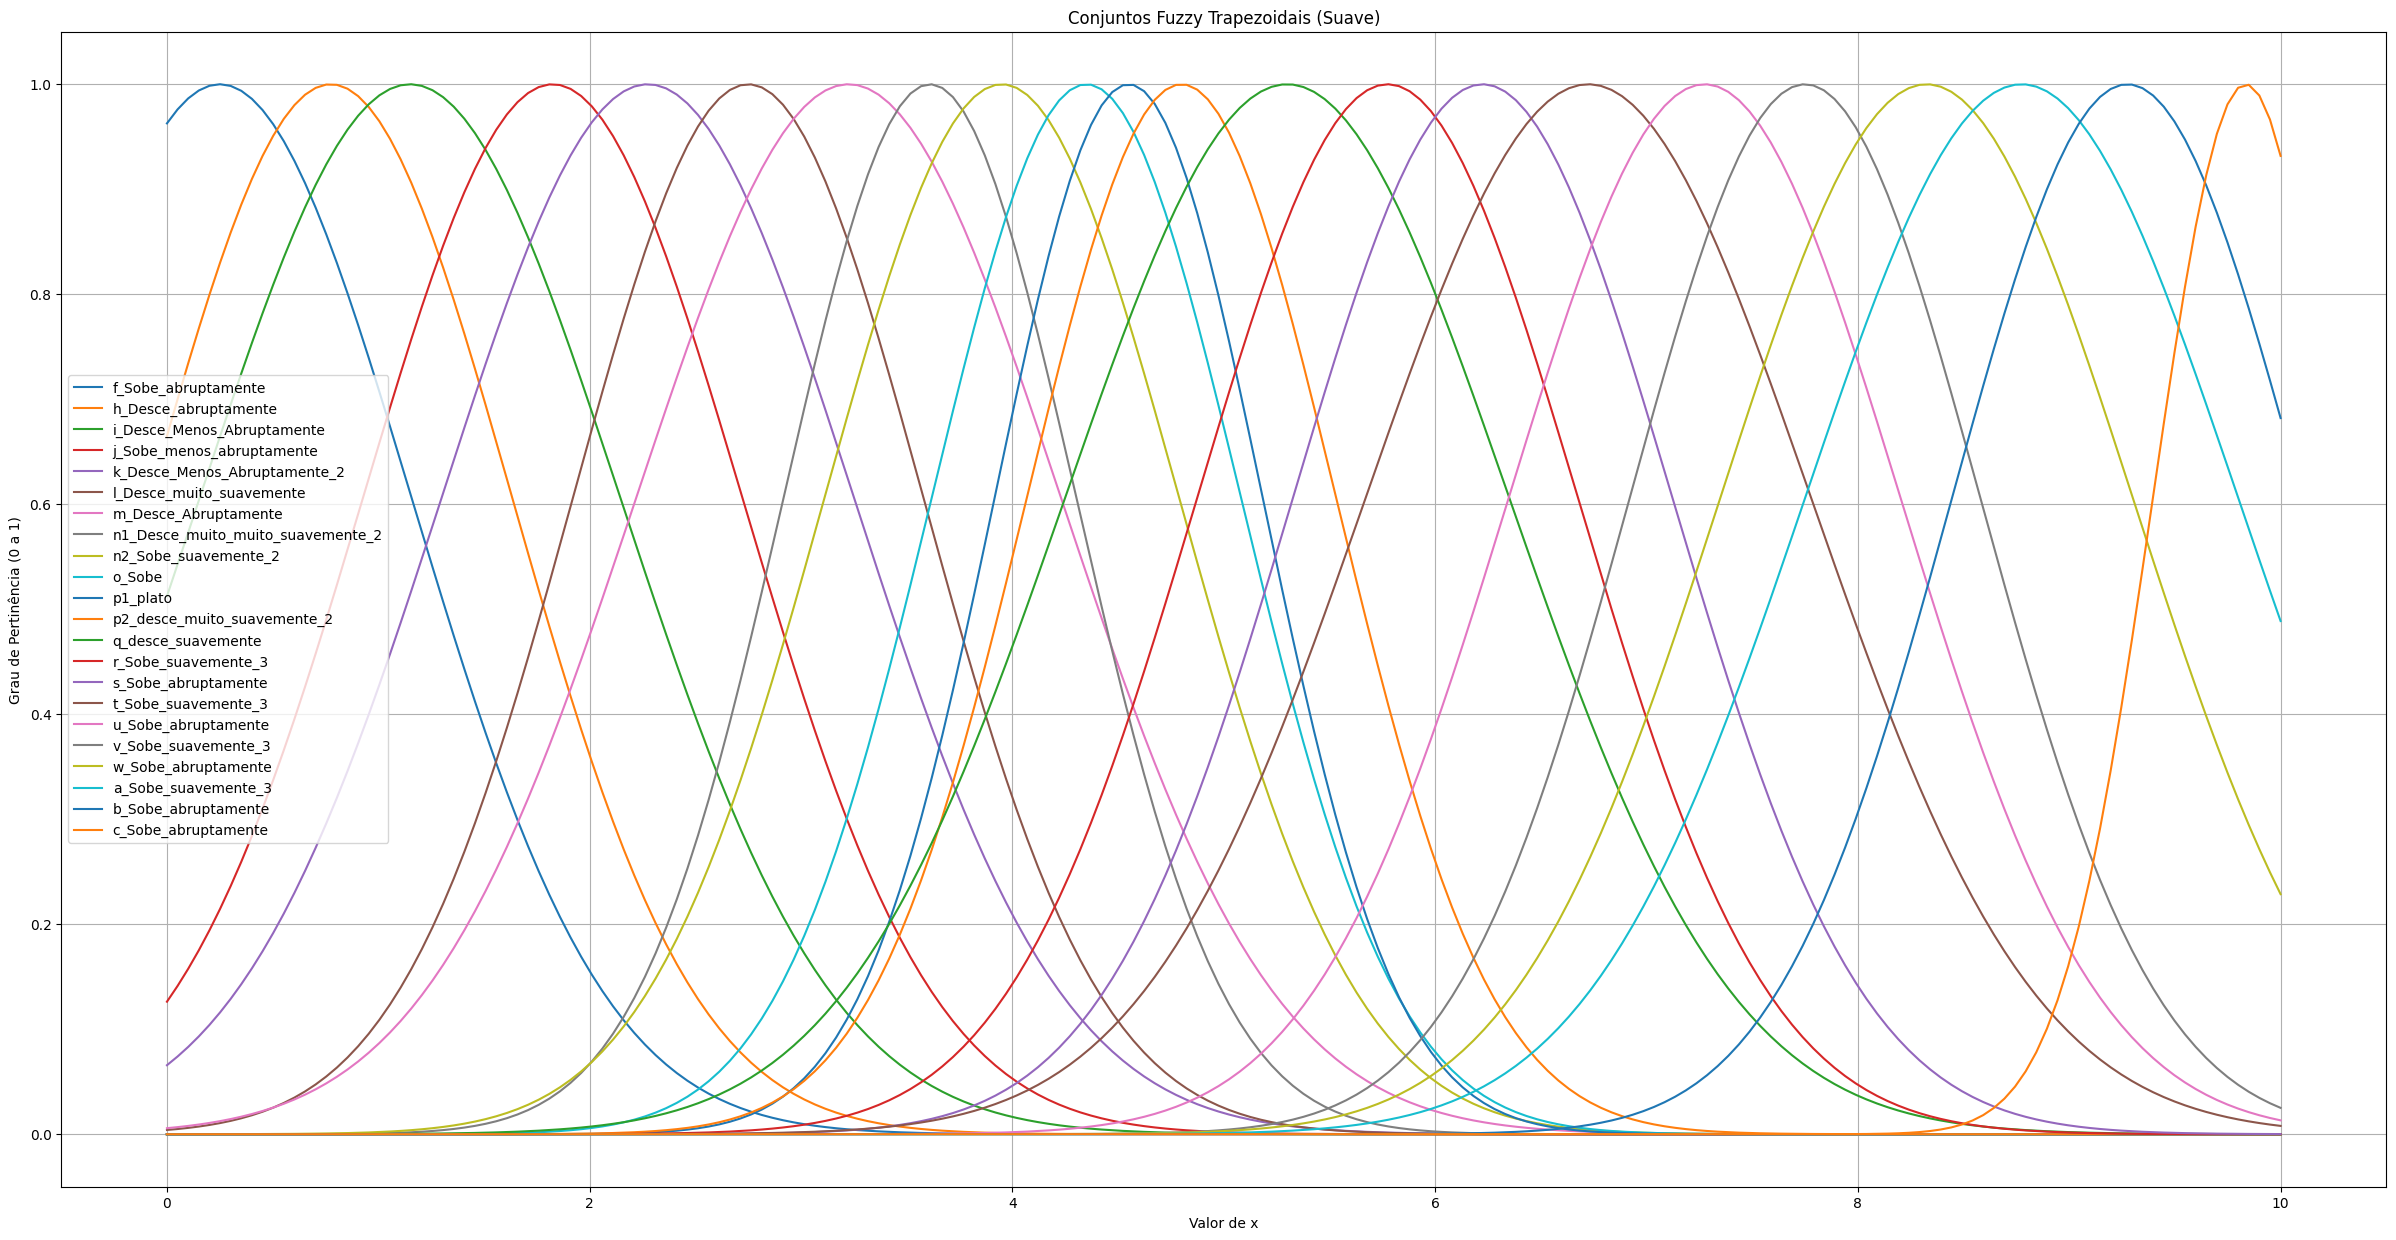

In [ ]:


# Gera muitos pontos igualmente espaçados entre 0 e 10
x_suave = np.linspace(0, 10, 200)

conjuntos = {
    "f_Sobe_abruptamente": [0.25, 0.2325 *3.9],
    "h_Desce_abruptamente": [0.775, 0.22 *3.9],
    "i_Desce_Menos_Abruptamente": [1.15, 0.255 *3.9],
    "j_Sobe_menos_abruptamente": [1.825, 0.23 *3.9],
    "k_Desce_Menos_Abruptamente_2": [2.275, 0.25 *3.9],
    "l_Desce_muito_suavemente": [2.75, 0.2125 *3.9],
    "m_Desce_Abruptamente": [3.225, 0.2575 *3.9],
    "n1_Desce_muito_muito_suavemente_2": [3.61, 0.1775 *3.9],
    "n2_Sobe_suavemente_2": [3.95, 0.215 *3.9],
    "o_Sobe": [4.35, 0.1875 *3.9],
    "p1_plato": [4.55, 0.1625 *3.9],
    "p2_desce_muito_suavemente_2": [4.8, 0.1875 *3.9],
    "q_desce_suavemente": [5.3, 0.2625 *3.9],
    "r_Sobe_suavemente_3": [5.775, 0.225 *3.9],
    "s_Sobe_abruptamente": [6.225, 0.23 *3.9],
    "t_Sobe_suavemente_3": [6.725, 0.27 *3.9],
    "u_Sobe_abruptamente": [7.275, 0.2375 *3.9],
    "v_Sobe_suavemente_3": [7.75, 0.2125 *3.9],
    "w_Sobe_abruptamente": [8.325, 0.25 *3.9],
    "a_Sobe_suavemente_3": [8.775, 0.2625 *3.9],
    "b_Sobe_abruptamente": [9.275, 0.2125 *3.9],
    "c_Sobe_abruptamente": [9.835, 0.1125 *3.9]
}

# Calcula pertinências para cada conjunto
pertinencias = {}
for nome, (c, sigmazinho) in conjuntos.items():
    pertinencias[nome] = Gaussiana(x_suave, sigmazinho, c)

# Plota os conjuntos fuzzy
plt.figure(figsize=(30, 15))
for nome, pert in pertinencias.items():
    plt.plot(x_suave, pert, label=nome)
plt.title("Conjuntos Fuzzy Trapezoidais (Suave)")
plt.xlabel("Valor de x")
plt.ylabel("Grau de Pertinência (0 a 1)")
plt.legend()
plt.grid()
plt.show()

### Criando os consequentes para cada conjunto Fuzzy. Em Takaki-Sugeno cada regra terá um consquente $y = p_i \cdot x + q_i$

In [190]:
from regras_consequentes01_TSK import *
modelo = np.zeros_like(x_suave)
peso_total = np.zeros_like(x_suave)

for consequente in consequentes:
    consequente_output = saida_do_consequente(consequentes[consequente]["p"], x_suave, consequentes[consequente]["q"])
    pertinencia = pertinencias[consequente]

    modelo += pertinencia * consequente_output
    peso_total += pertinencia

modelo = np.divide(modelo, peso_total, where = (peso_total != 0))


print(modelo[3])
imagem_func_nao_linear = func_nao_linear(x_suave)
print(imagem_func_nao_linear[3])


1.174271168688043
1.0453909436451738


In [191]:
mse = np.mean((modelo-imagem_func_nao_linear)**2)
rmse = np.sqrt(mse)
print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")


MSE: 0.1144, RMSE: 0.3382


### Validando

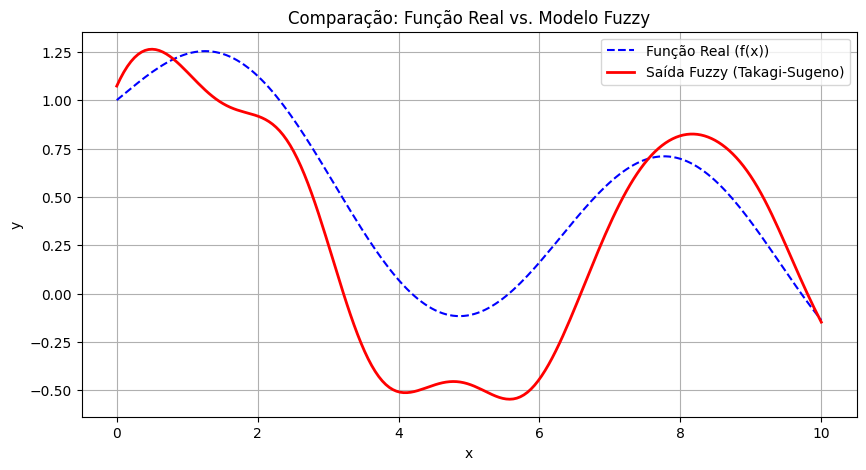

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(x_suave, imagem_func_nao_linear, label="Função Real (f(x))", color='blue', linestyle='--')
plt.plot(x_suave, modelo, label="Saída Fuzzy (Takagi-Sugeno)", color='red', linewidth=2)
plt.title("Comparação: Função Real vs. Modelo Fuzzy")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

In [193]:

print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}")

MSE: 0.1144, RMSE: 0.3382
